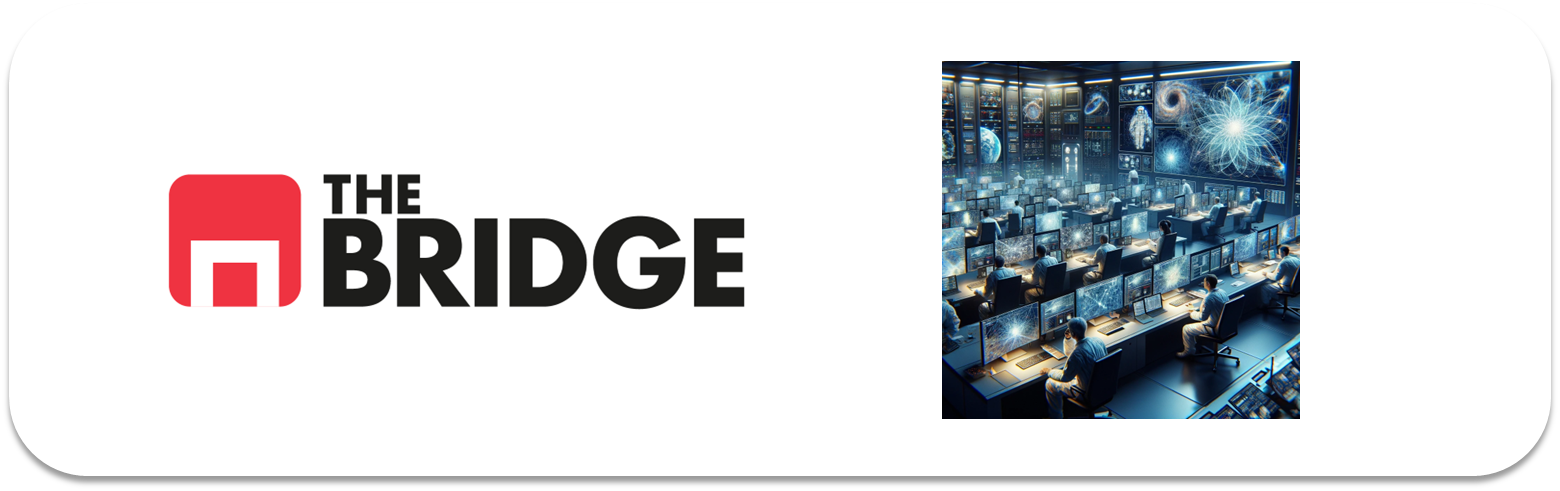

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [17]:
import os
import numpy as np
import cv2  # Para procesar las imágenes
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

# Directorios de los datos
train_dirs = [
    "C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data/github_train_0",
    "C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data/github_train_1",
    "C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data/github_train_2",
    "C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data/github_train_3"
]
test_dir = "C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data/github_test"


### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [18]:
def load_images_from_directory(directory, label):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (32, 32))
            img = img_to_array(img)
            images.append(img)
            labels.append(label)
    
    return images, labels

train_images = []
train_labels = []
for i, directory in enumerate(train_dirs):
    label = 0 if i % 2 == 0 else 1
    images, labels = load_images_from_directory(directory, label)
    train_images.extend(images)
    train_labels.extend(labels)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = []
test_labels = []
for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(test_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        img = img_to_array(img)
        label = 0 if "dog" in filename else 1
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\angel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4814 - loss: 0.7025 - val_accuracy: 0.5038 - val_loss: 0.6931
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5176 - loss: 0.6924 - val_accuracy: 0.5100 - val_loss: 0.6932
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5180 - loss: 0.6929 - val_accuracy: 0.5050 - val_loss: 0.6927
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5200 - loss: 0.6920 - val_accuracy: 0.4925 - val_loss: 0.6930
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5338 - loss: 0.6879 - val_accuracy: 0.4875 - val_loss: 0.6931
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5649 - loss: 0.6766 - val_accuracy: 0.4963 - val_loss: 0.6965
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5924 - loss: 0.6622 - val_accuracy: 0.4938 - val_loss: 0.7079
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6106 - loss: 0.6410 - val_accu

32/32 - 1s - 21ms/step - accuracy: 0.5180 - loss: 0.6924
Test accuracy: 0.5180000066757202
Test loss: 0.6923573017120361
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Clasification Report:
              precision    recall  f1-score   support

           0       0.51      0.94      0.66       500
           1       0.61      0.10      0.17       500

    accuracy                           0.52      1000
   macro avg       0.56      0.52      0.41      1000
weighted avg       0.56      0.52      0.41      1000



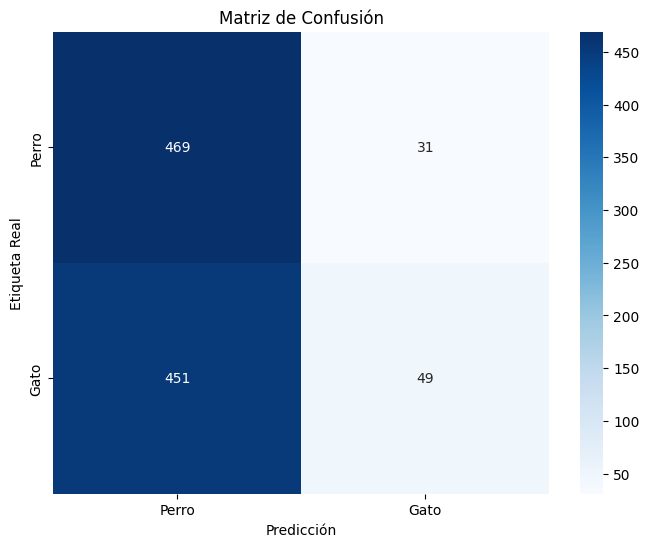

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

print("Clasification Report:")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Perro", "Gato"], yticklabels=["Perro", "Gato"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


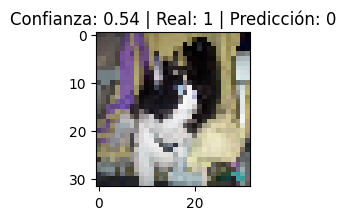

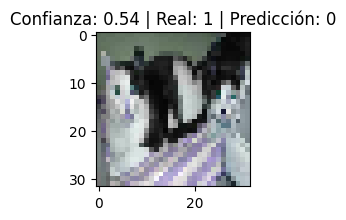

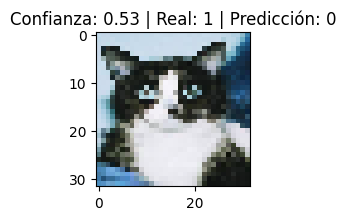

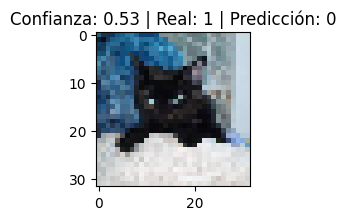

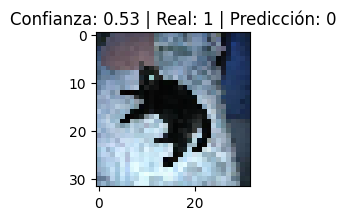

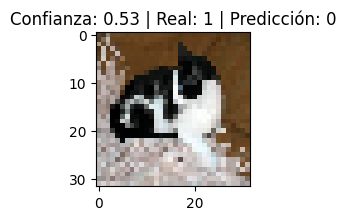

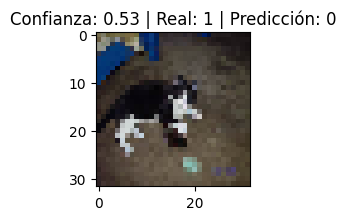

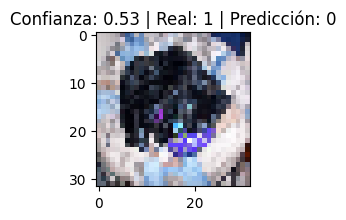

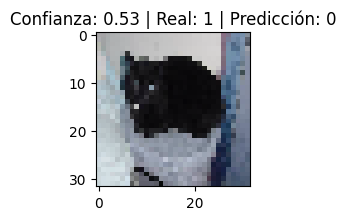

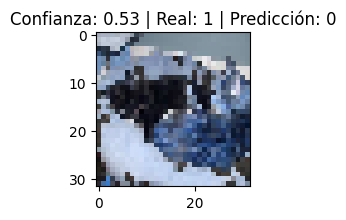

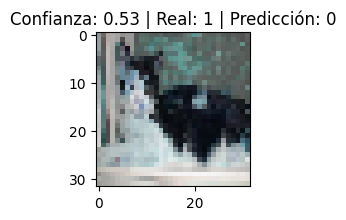

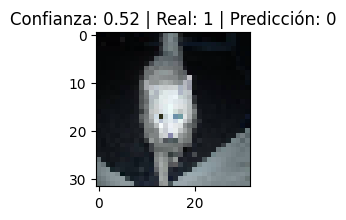

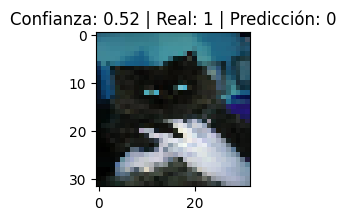

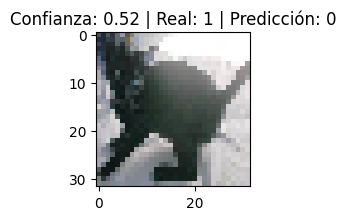

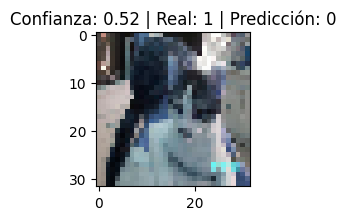

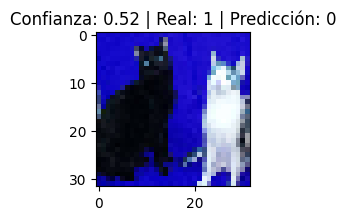

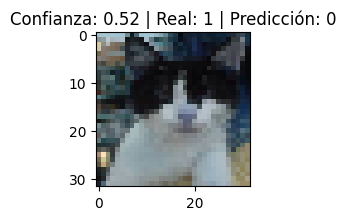

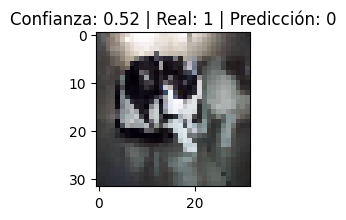

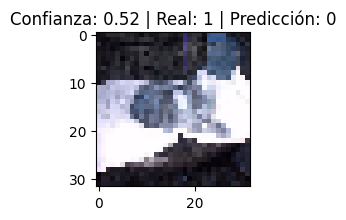

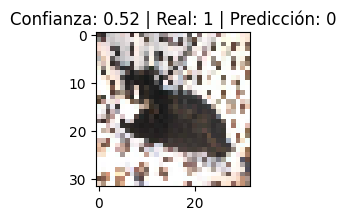

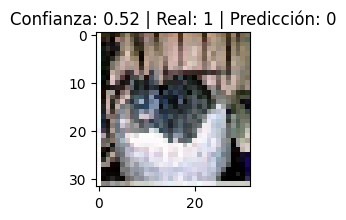

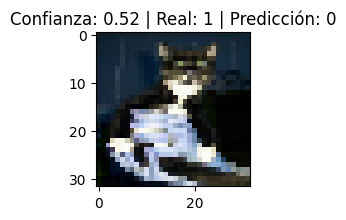

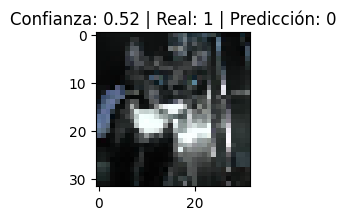

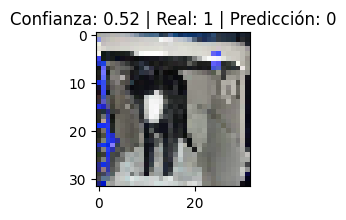

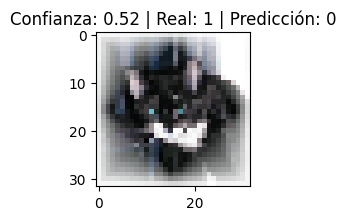

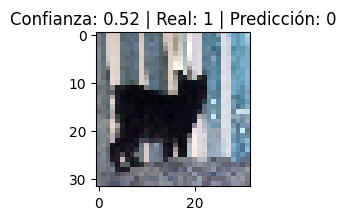

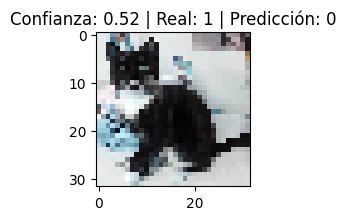

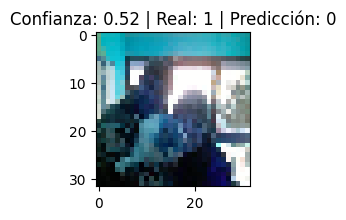

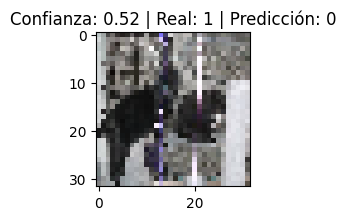

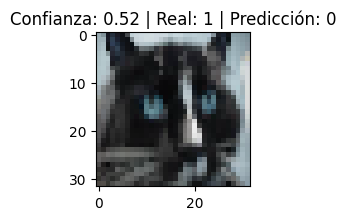

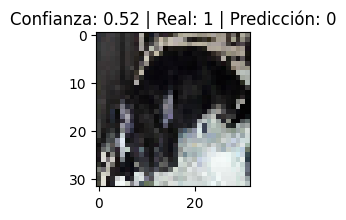

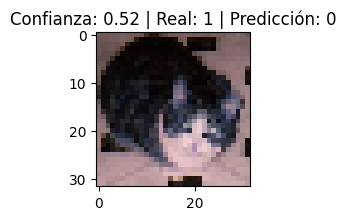

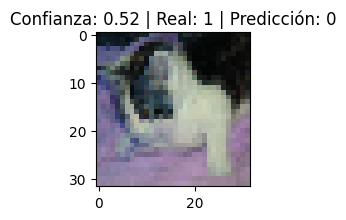

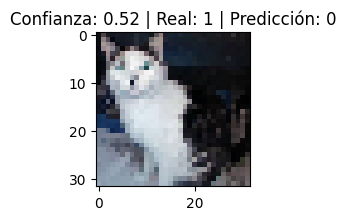

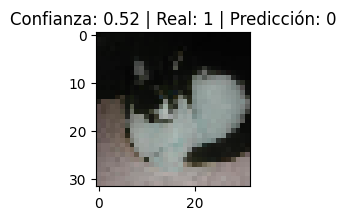

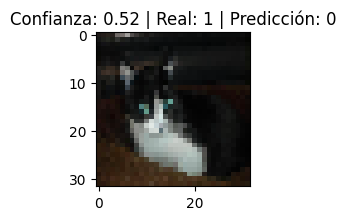

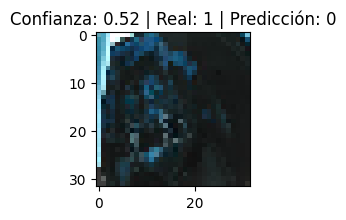

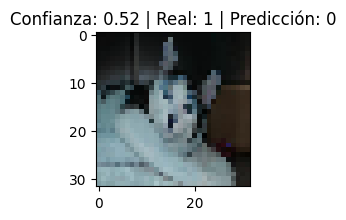

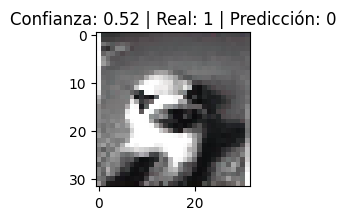

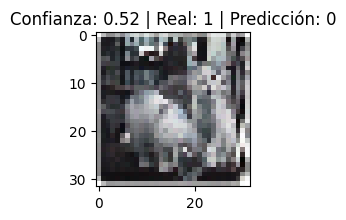

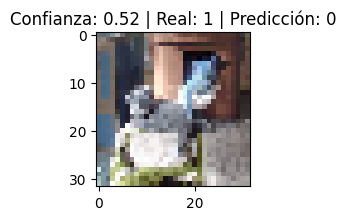

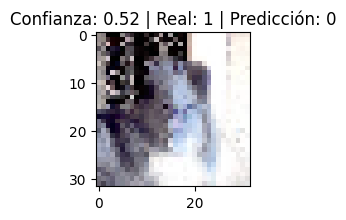

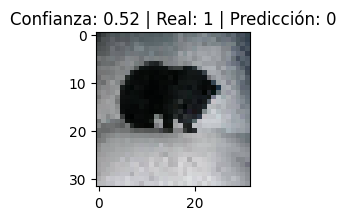

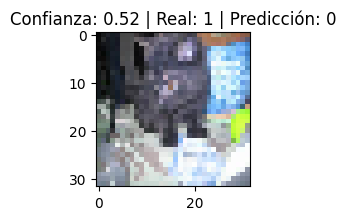

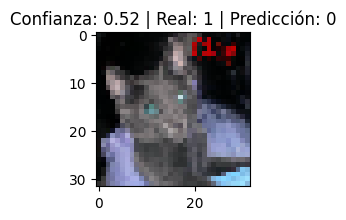

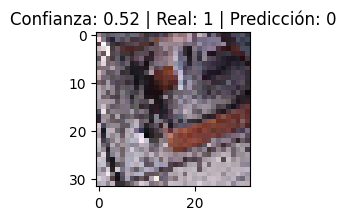

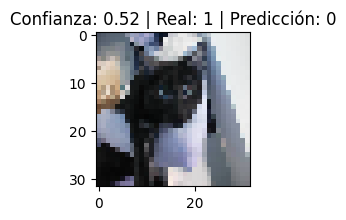

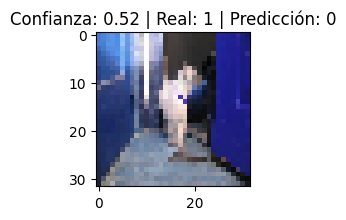

In [22]:
pred_probabilities = model.predict(test_images)
incorrect_preds = []
for i in range(len(pred_probabilities)):
    if y_pred_classes[i] != y_true[i]:
        confidence = pred_probabilities[i][y_pred_classes[i]]
        incorrect_preds.append((test_images[i], confidence, y_true[i], y_pred_classes[i]))

incorrect_preds = sorted(incorrect_preds, key=lambda x: x[1], reverse=True)
num_to_select = int(0.1 * len(incorrect_preds))
selected_images = incorrect_preds[:num_to_select]

for i, (img, conf, true_label, pred_label) in enumerate(selected_images):
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(f"Confianza: {conf:.2f} | Real: {true_label} | Predicción: {pred_label}")
    plt.show()